In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

[' Heart Disease Prediction By Prince.ipynb', '-1.14-windows.xml', '.anaconda', '.android', '.conda', '.condarc', '.continuum', '.dotnet', '.idlerc', '.ipynb_checkpoints', '.ipython', '.jdks', '.jupyter', '.keras', '.Ld9VirtualBox', '.matplotlib', '.ms-ad', '.templateengine', '.vscode', '1Stock_Price_Prediction_using_Machine_Learning_in_Python.ipynb', '3D Objects', 'anaconda3', 'AppData', 'Apple', 'Application Data', 'Contacts', 'Cookies', 'DataBaseOperation.py', 'Documents', 'Downloads', 'Favorites', 'GestureAPI.pyc', 'Hand Gestures Controlled Presentation System.ipynb', 'HandRecognition.py', 'heart.csv', 'IdeaProjects', 'Links', 'Local Settings', 'Microsoft', 'movie .ipynb', 'movies.csv', 'Music', 'My Documents', 'NetHood', 'new_file.csv', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:

type(dataset)

pandas.core.frame.DataFrame

In [4]:
dataset.shape


(303, 14)

In [5]:
dataset.head(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
181,65,0,0,150,225,0,0,114,0,1.0,1,3,3,0
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


In [7]:
dataset.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
dataset["target"].describe()


count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()


array([1, 0], dtype=int64)

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))


target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


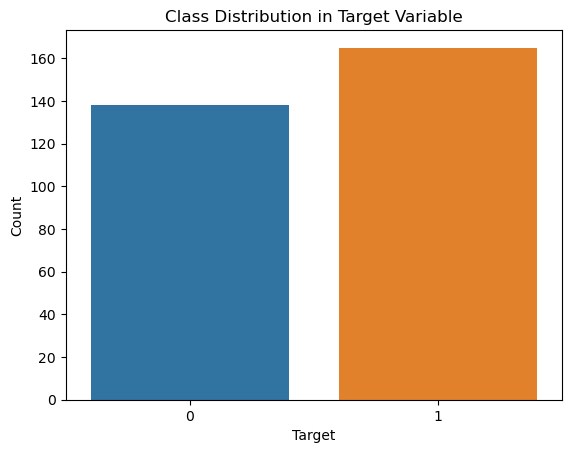

target
1    165
0    138
Name: count, dtype: int64


In [13]:


y = dataset["target"]

sns.countplot(x=y)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Class Distribution in Target Variable")
plt.show()

target_temp = dataset.target.value_counts()
print(target_temp)


In [14]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [15]:

dataset["sex"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='sex', ylabel='target'>

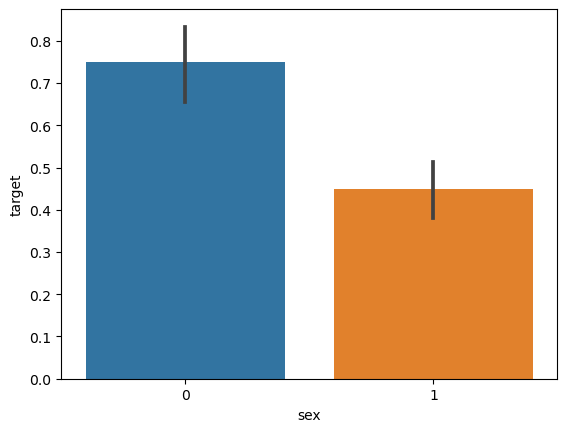

In [16]:
sns.barplot(x="sex", y="target", data=dataset)


In [17]:

dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

<Axes: xlabel='cp', ylabel='target'>

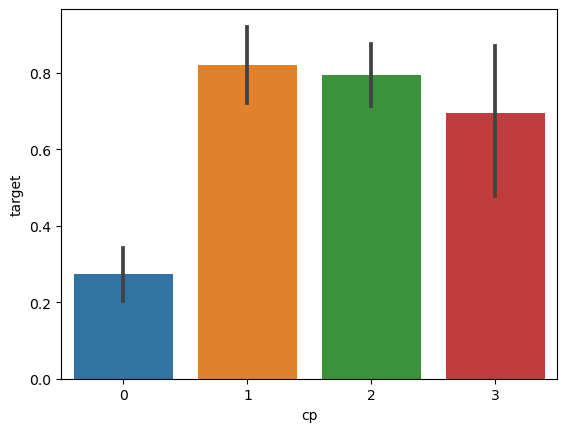

In [18]:
sns.barplot(x=dataset["cp"], y=y)


In [19]:

dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [20]:
dataset["fbs"].unique()


array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

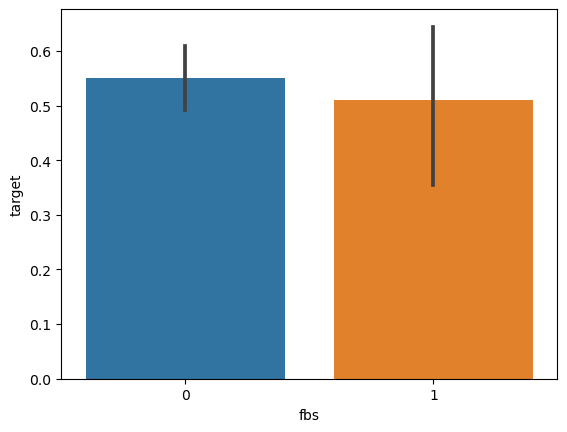

In [21]:
sns.barplot(x="fbs", y="target", data=dataset)


In [22]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

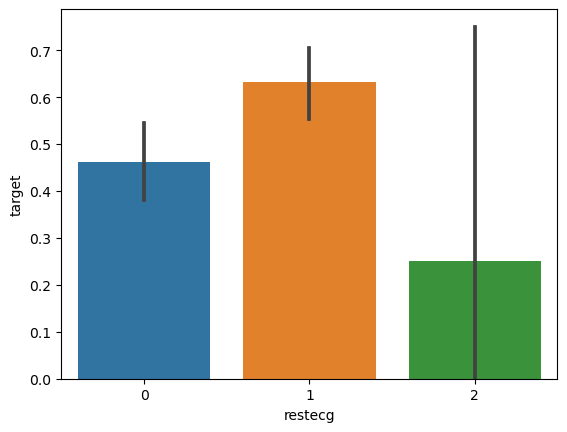

In [23]:
sns.barplot(x="restecg", y="target", data=dataset)

In [24]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

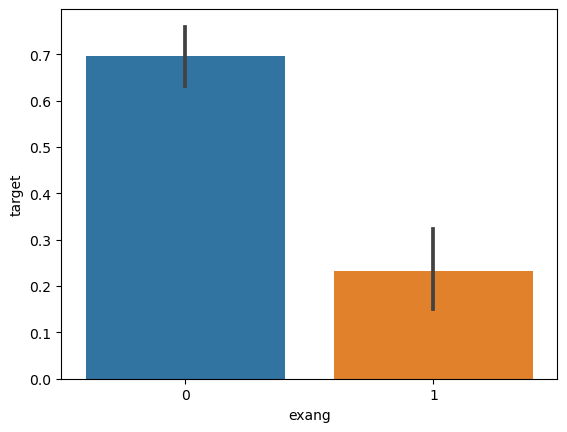

In [25]:
sns.barplot(x="exang", y="target", data=dataset)

In [26]:

dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

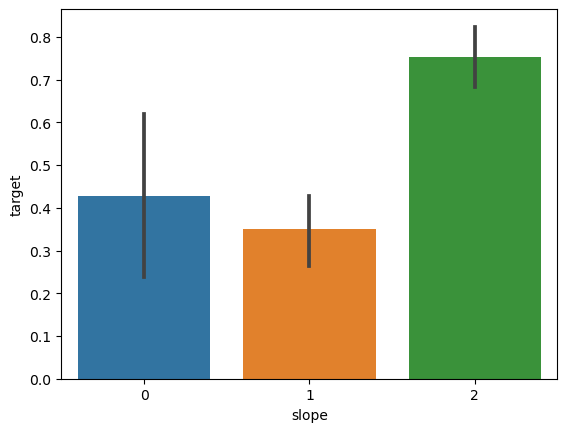

In [27]:
sns.barplot(x="slope", y="target", data=dataset)

In [28]:

dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: xlabel='ca', ylabel='count'>

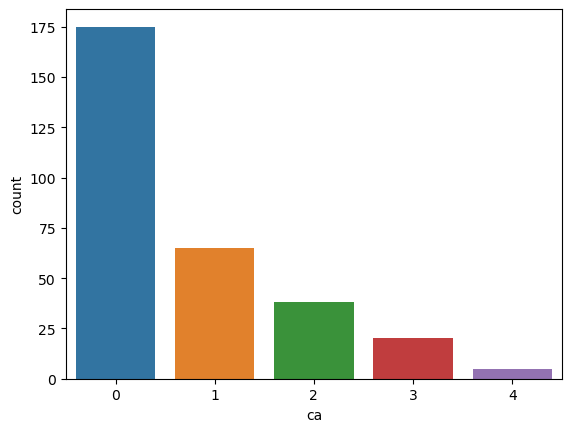

In [29]:
sns.countplot(x="ca", data=dataset)

<Axes: xlabel='ca', ylabel='target'>

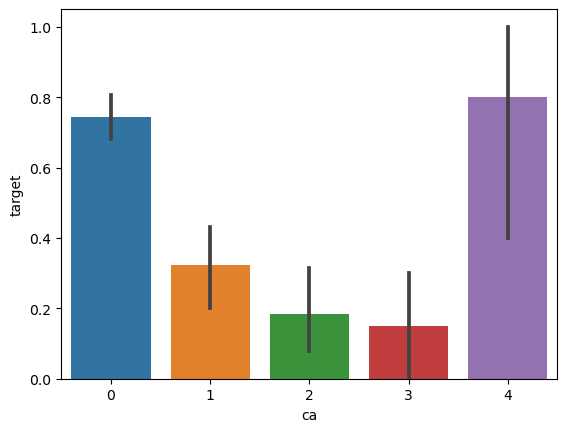

In [30]:
sns.barplot(x="ca", y="target", data=dataset)

In [31]:

dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

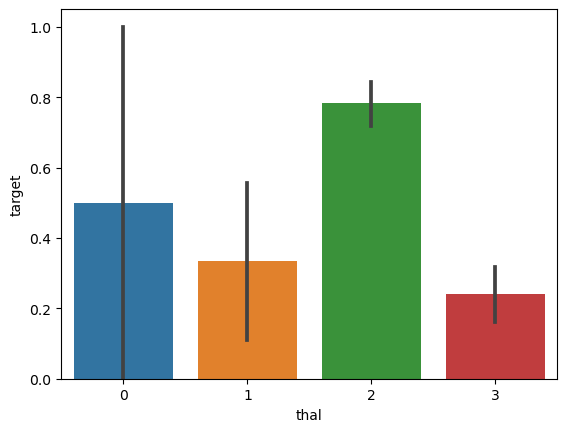

In [32]:
sns.barplot(x="thal", y="target", data=dataset)

<Axes: xlabel='thal', ylabel='Density'>

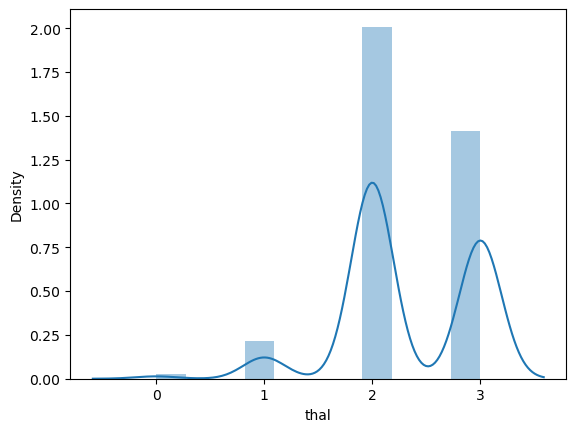

In [33]:

sns.distplot(dataset["thal"])

In [34]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [35]:

X_train.shape

(242, 13)

In [36]:

X_test.shape

(61, 13)

In [37]:

Y_train.shape

(242,)

In [38]:

Y_test.shape

(61,)

In [39]:

from sklearn.metrics import accuracy_score

In [40]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [41]:
Y_pred_lr.shape

(61,)

In [42]:

score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


In [43]:

from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [44]:

Y_pred_nb.shape

(61,)

In [45]:

score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


In [46]:

from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [47]:

Y_pred_svm.shape

(61,)

In [48]:

score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


In [49]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [50]:

Y_pred_knn.shape

(61,)

In [51]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


In [52]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


In [53]:

print(Y_pred_dt.shape)

(61,)


In [54]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 78.69 %


In [55]:

from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [56]:

Y_pred_rf.shape

(61,)

In [57]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


In [58]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [59]:

Y_pred_xgb.shape

(61,)

In [60]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [61]:
pip show tensorflow


Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\hp\AppData\Roaming\Python\Python311\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [63]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 78.69 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %


<Axes: >

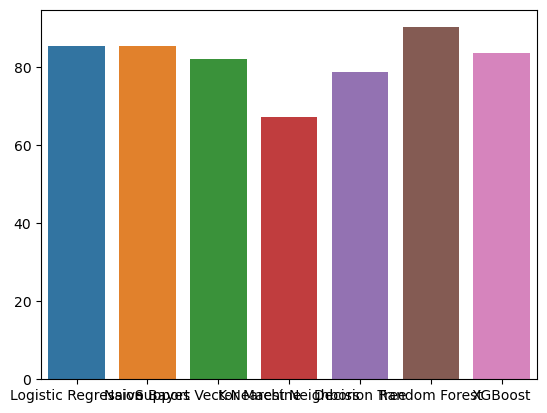

In [64]:
sns.barplot(x=algorithms, y=scores)


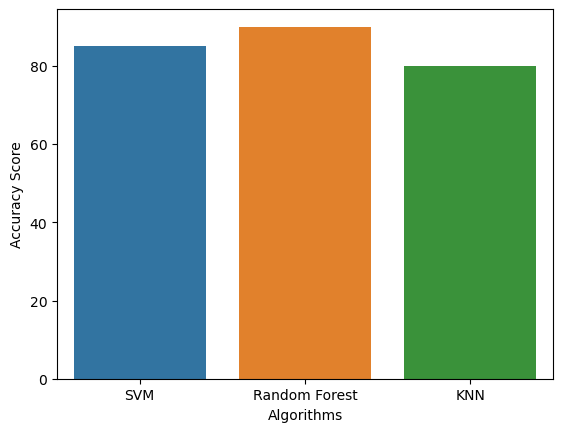

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

algorithms = ['SVM', 'Random Forest', 'KNN']
scores = [85, 90, 80]

sns.barplot(x=algorithms, y=scores)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()
